In [1]:
from datetime import datetime

import numpy as np
import pandas as pd
import pandas_datareader.data as web
import yfinance as yf

import matplotlib.pyplot as plt

from arch import arch_model
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Data

In [2]:
sp500 = yf.download('^GSPC', start='1970-01-01', end='2024-04-26')['Adj Close']
ge = yf.download('GE', start='1970-01-01', end='2024-04-26')['Adj Close']

monthly_sp500=sp500.resample('ME').last()
monthly_ge=ge.resample('ME').last()

annualy_sp500=sp500.resample('YE').last()
annualy_ge=ge.resample('YE').last()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [3]:
sp500=np.log(sp500/sp500.shift(1))[1:]
ge=np.log(ge/ge.shift(1))[1:]
monthly_sp500=np.log(monthly_sp500/monthly_sp500.shift(1))[1:]
monthly_ge=np.log(monthly_ge/monthly_ge.shift(1))[1:]
annualy_sp500=np.log(annualy_sp500/annualy_sp500.shift(1))[1:]
annualy_ge=np.log(annualy_ge/annualy_ge.shift(1))[1:]

In [4]:
sp500_monthly_vol=sp500.resample('ME').std()*np.sqrt(22)
ge_monthly_vol=ge.resample('ME').std()*np.sqrt(22)

# this is just abs return?
agg_sp500_monthly_vol=monthly_sp500.abs()
agg_ge_monthly_vol=monthly_ge.abs()


#### 1

### (a)

In [5]:
# figures, axes=plt.subplots(2,2)
# fig, axes = plt.subplots(2, 2, figsize=(12, 8))
print(acf(sp500.dropna(), nlags=5))
print(acf(monthly_sp500.dropna(), nlags=5))
print(acf(annualy_sp500.dropna(), nlags=5))
print(acf(ge.dropna(), nlags=5))
print(acf(monthly_ge.dropna(), nlags=5))
print(acf(annualy_ge.dropna(), nlags=5))

[ 1.         -0.01739987 -0.01435179 -0.00373228 -0.02443656 -0.00482602]
[ 1.          0.02203074 -0.05086682  0.03398881  0.01038939  0.06154224]
[ 1.         -0.06449594 -0.14680203  0.02763828  0.08765153 -0.29266323]
[ 1.00000000e+00  3.72094059e-03 -1.13781522e-02 -1.06744507e-02
  7.34292340e-04 -1.91569517e-02]
[1.         0.07042099 0.00602925 0.02749159 0.07141757 0.0499989 ]
[ 1.          0.13340606 -0.07729362  0.00458046  0.0913945  -0.24777603]


### (b)

In [6]:
print('i)')
print('annualized daily volatility of S&P 500:', sp500.std()*np.sqrt(252))
print('annualized daily volatility of GE:', ge.std()*np.sqrt(252))
print('ii)')
print('annualized monthly volatility of S&P 500:', monthly_sp500.std()*np.sqrt(12))
print('annualized monthly volatility of GE:', monthly_ge.std()*np.sqrt(12))
print('iii)')
print('annualized annual volatility of S&P 500:', annualy_sp500.std())
print('annualized annual volatility of GE:', annualy_ge.std())

i)
annualized daily volatility of S&P 500: 0.17260310676400414
annualized daily volatility of GE: 0.28401337914729985
ii)
annualized monthly volatility of S&P 500: 0.15440699979393413
annualized monthly volatility of GE: 0.26477099427961925
iii)
annualized annual volatility of S&P 500: 0.16747816642248872
annualized annual volatility of GE: 0.3030789049744495


The estimation of std is aggregated from different frequencies, so they are different.

### (c)

In [7]:
def calc_3(df,input):
    print(f'mean of {input}:', df.mean())
    print(f'std of{input}:', df.std())
calc_3(sp500_monthly_vol.dropna(),'S&P 500 monthly volatility')
calc_3(agg_sp500_monthly_vol,'S&P 500 monthly volatility based on daily data')
print()

print('corr between monthly volatility and monthly volatility based on daily data of S&P 500:')
print(np.corrcoef(sp500_monthly_vol.iloc[1:],agg_sp500_monthly_vol)[0,1])
print()

calc_3(ge_monthly_vol,'GE monthly volatility')
calc_3(agg_ge_monthly_vol,'GE monthly volatility based on daily data')
print() 

print('corr between monthly volatility and monthly volatility based on daily data of GE:')
print(np.corrcoef(ge_monthly_vol.iloc[1:],agg_ge_monthly_vol)[0,1])


mean of S&P 500 monthly volatility: 0.04375896616149883
std ofS&P 500 monthly volatility: 0.026421220264375208
mean of S&P 500 monthly volatility based on daily data: 0.03440222540353735
std ofS&P 500 monthly volatility based on daily data: 0.02899784301199057

corr between monthly volatility and monthly volatility based on daily data of S&P 500:
0.5126262543579004

mean of GE monthly volatility: 0.07370985868687736
std ofGE monthly volatility: 0.04077167249829648
mean of GE monthly volatility based on daily data: 0.056187929980479036
std ofGE monthly volatility based on daily data: 0.052527159808771644

corr between monthly volatility and monthly volatility based on daily data of GE:
0.5095936765352649


In [8]:
def calc_3(df,input):
    print(f'mean of {input}:', df.mean())
    print(f'std of {input}:', df.std())
calc_3(sp500_monthly_vol.dropna(),'S&P 500 monthly volatility')
calc_3(agg_sp500_monthly_vol,'S&P 500 monthly volatility based on daily data')
print()

print('corr between monthly volatility and monthly volatility based on daily data of S&P 500:')
print(np.corrcoef(sp500_monthly_vol.iloc[1:],agg_sp500_monthly_vol)[0,1])
print()

calc_3(ge_monthly_vol,'GE monthly volatility')
calc_3(agg_ge_monthly_vol,'GE monthly volatility based on daily data')
print()

print('corr between monthly volatility and monthly volatility based on daily data of GE:')
print(np.corrcoef(ge_monthly_vol.iloc[1:],agg_ge_monthly_vol)[0,1])

mean of S&P 500 monthly volatility: 0.04375896616149883
std of S&P 500 monthly volatility: 0.026421220264375208
mean of S&P 500 monthly volatility based on daily data: 0.03440222540353735
std of S&P 500 monthly volatility based on daily data: 0.02899784301199057

corr between monthly volatility and monthly volatility based on daily data of S&P 500:
0.5126262543579004

mean of GE monthly volatility: 0.07370985868687736
std of GE monthly volatility: 0.04077167249829648
mean of GE monthly volatility based on daily data: 0.056187929980479036
std of GE monthly volatility based on daily data: 0.052527159808771644

corr between monthly volatility and monthly volatility based on daily data of GE:
0.5095936765352649


In [9]:
sp500_monthly_vol

Date
1970-01-31    0.026830
1970-02-28    0.033383
1970-03-31    0.032435
1970-04-30    0.035662
1970-05-31    0.093128
                ...   
2023-12-31    0.028508
2024-01-31    0.032611
2024-02-29    0.035954
2024-03-31    0.029113
2024-04-30    0.036943
Freq: ME, Name: Adj Close, Length: 652, dtype: float64

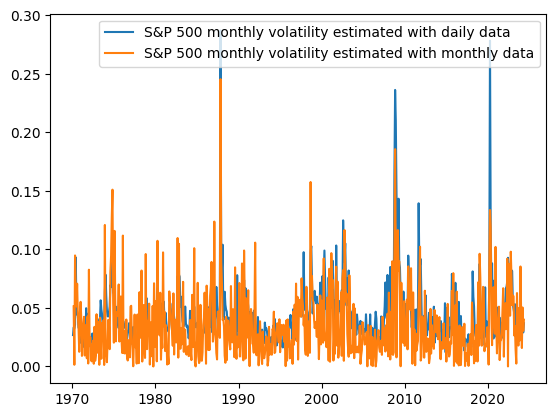

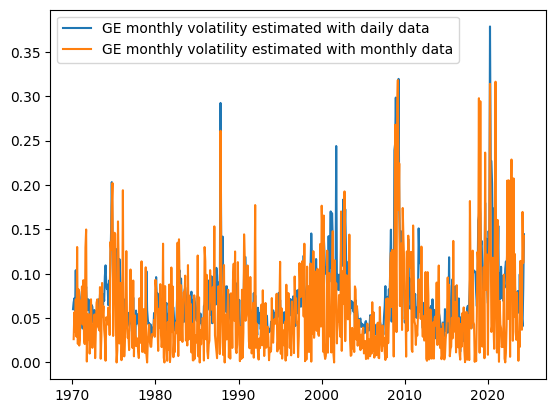

In [10]:
plt.plot(sp500_monthly_vol,label='S&P 500 monthly volatility estimated with daily data')
plt.plot(agg_sp500_monthly_vol,label='S&P 500 monthly volatility estimated with monthly data')
plt.legend()
plt.show()
plt.plot(ge_monthly_vol,label='GE monthly volatility estimated with daily data')
plt.plot(agg_ge_monthly_vol,label='GE monthly volatility estimated with monthly data')
plt.legend()
plt.show()

### (d)(e)(f)

1.We can oberseve obvious lag of prediction compared with the true vol. 2. The prediction value is far more stable and it hardly matches the extreme values.

In [11]:
realized_sp500_monthly_vol=(sp500.resample('ME')).agg(lambda x: (x**2).sum())
realized_ge_monthly_vol=(ge.resample('ME')).agg(lambda x: (x**2).sum())
realized_ge_monthly_vol.name=None
realized_sp500_monthly_vol.name=None

/home/lema/envs/Python/mfe230e/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:              logreturn   No. Observations:                  651
Model:                 ARIMA(1, 0, 0)   Log Likelihood                1101.941
Date:                Mon, 29 Apr 2024   AIC                          -2197.882
Time:                        13:38:56   BIC                          -2184.447
Sample:                             0   HQIC                         -2192.671
                                - 651                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0063      0.002      3.133      0.002       0.002       0.010
ar.L1          0.0221      0.032      0.695      0.487      -0.040       0.084
sigma2         0.0020   7.96e-05     24.893      0.0

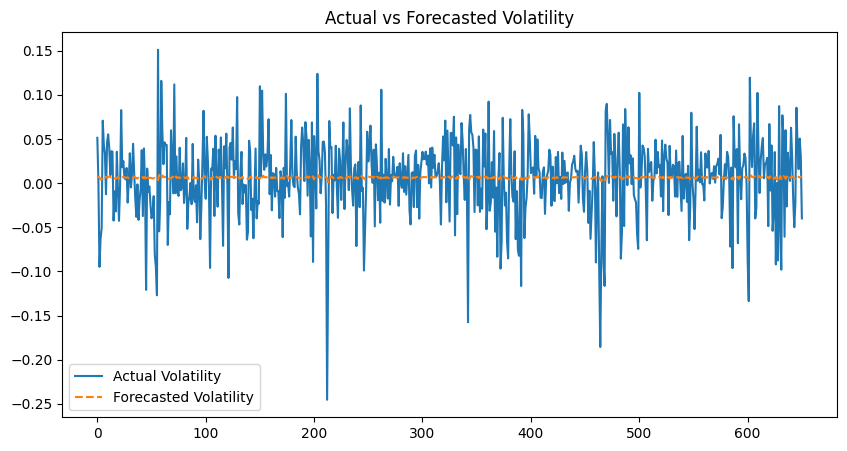

AR MSE: 0.0019827771417819237
AR MAE: 0.033499944450777835


In [12]:
def pipeline4(data):

    data = pd.DataFrame(data.values, columns=['logreturn'])

    model = ARIMA(data['logreturn'], order=(1,0,0))
    model_fitted = model.fit(method_kwargs={'maxiter':0})
    print(model_fitted.summary() )
    data['forecast'] = model_fitted.fittedvalues

    mse = np.mean(np.square(data['logreturn'] - data['forecast']))
    mae = np.mean(np.abs(data['logreturn'] - data['forecast']))
    plt.figure(figsize=(10,5))
    plt.plot(data['logreturn'], label='Actual Volatility')
    plt.plot(data['forecast'], label='Forecasted Volatility', linestyle='--')
    plt.legend()
    plt.title('Actual vs Forecasted Volatility')
    plt.show()
    print('AR MSE:', mse)
    print('AR MAE:', mae)
    
pipeline4(monthly_sp500)

                               SARIMAX Results                                
Dep. Variable:              logreturn   No. Observations:                  652
Model:                 ARIMA(1, 0, 0)   Log Likelihood                2169.298
Date:                Mon, 29 Apr 2024   AIC                          -4332.596
Time:                        13:38:56   BIC                          -4319.156
Sample:                             0   HQIC                         -4327.384
                                - 652                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0067      0.002      4.244      0.000       0.004       0.010
ar.L1          0.5685      0.013     42.342      0.000       0.542       0.595
sigma2      7.531e-05   1.04e-06     72.570      0.0

/home/lema/envs/Python/mfe230e/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


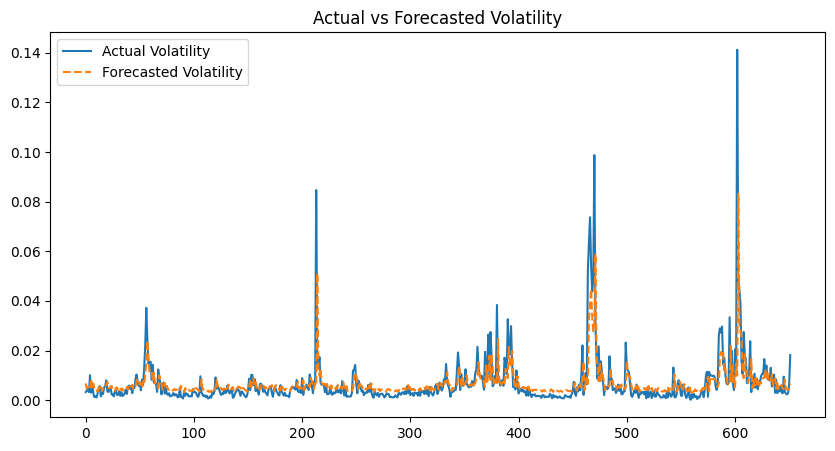

AR MSE: 7.540123687400394e-05
AR MAE: 0.0037053382075967933


In [13]:
pipeline4(realized_ge_monthly_vol)

In [14]:
monthly_sp500.name=None
monthly_ge.name=None
monthly_sp500=pd.DataFrame(monthly_sp500,columns=['logreturn'])
monthly_sp500['realized_vol']=realized_sp500_monthly_vol.iloc[1:]
monthly_ge=pd.DataFrame(monthly_ge,columns=['logreturn'])
monthly_ge['realized_vol']=realized_ge_monthly_vol.iloc[1:]

## 2

### (a) (b) (c)

1.The model still cannot capture the extreme values 2.RMSE is even smaller than AR model.

Iteration:      5,   Func. Count:     39,   Neg. LLF: -1080.248034319472
Iteration:     10,   Func. Count:     73,   Neg. LLF: -1126.1507130775826
Optimization terminated successfully    (Exit mode 0)
            Current function value: -1127.0120365819423
            Iterations: 15
            Function evaluations: 96
            Gradient evaluations: 14
                     Constant Mean - GARCH Model Results                      
Dep. Variable:              logreturn   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                1127.01
Distribution:                  Normal   AIC:                          -2246.02
Method:            Maximum Likelihood   BIC:                          -2228.11
                                        No. Observations:                  651
Date:                Mon, Apr 29 2024   Df Residuals:                      650
Time:     

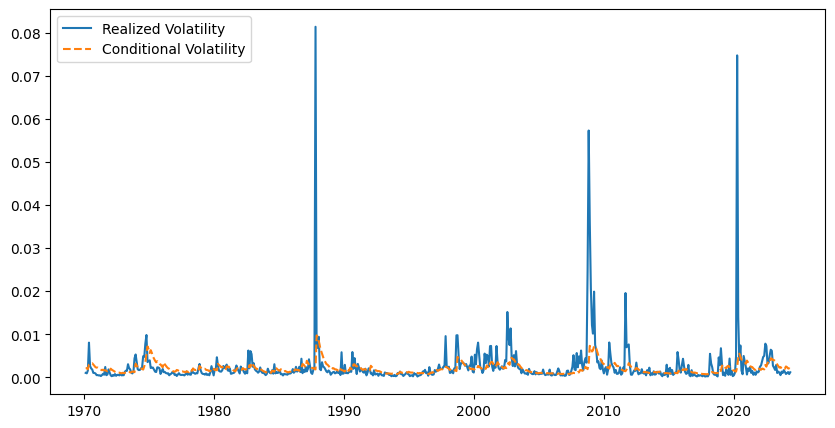

GARCH RMSE: 0.005324049687354842
GARCH MAE: 0.001580150380844224


In [15]:

def garch_1_1(data):
    garch_model = arch_model(data['logreturn'], mean='constant',vol='Garch', p=1, q=1,rescale=False)
    garch_result = garch_model.fit(update_freq=5)

    # Print out the summary of the GARCH model to see the parameters.
    print(garch_result.summary())

    # Use the model to estimate the conditional volatility.
    data['conditional_volatility'] = (garch_result.conditional_volatility)**2

    # Plot the realized volatility against the conditional volatility.
    plt.figure(figsize=(10,5))
    plt.plot(data.index, data['realized_vol'], label='Realized Volatility')
    plt.plot(data.index, data['conditional_volatility'], label='Conditional Volatility', linestyle='--')
    plt.legend()
    plt.show()

    # Calculate the RMSE for the GARCH model forecasts.
    garch_rmse = np.sqrt(np.mean(np.square(data['realized_vol'] - data['conditional_volatility'])))
    garch_mae = np.mean(np.abs(data['realized_vol'] - data['conditional_volatility']))
    print('GARCH RMSE:', garch_rmse)
    print('GARCH MAE:', garch_mae)
garch_1_1(monthly_sp500)


Iteration:      5,   Func. Count:     42,   Neg. LLF: -691.2120106905197
Iteration:     10,   Func. Count:     68,   Neg. LLF: -807.563082965461
Optimization terminated successfully    (Exit mode 0)
            Current function value: -807.563082966325
            Iterations: 10
            Function evaluations: 68
            Gradient evaluations: 10
                     Constant Mean - GARCH Model Results                      
Dep. Variable:              logreturn   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                807.563
Distribution:                  Normal   AIC:                          -1607.13
Method:            Maximum Likelihood   BIC:                          -1589.21
                                        No. Observations:                  651
Date:                Mon, Apr 29 2024   Df Residuals:                      650
Time:         

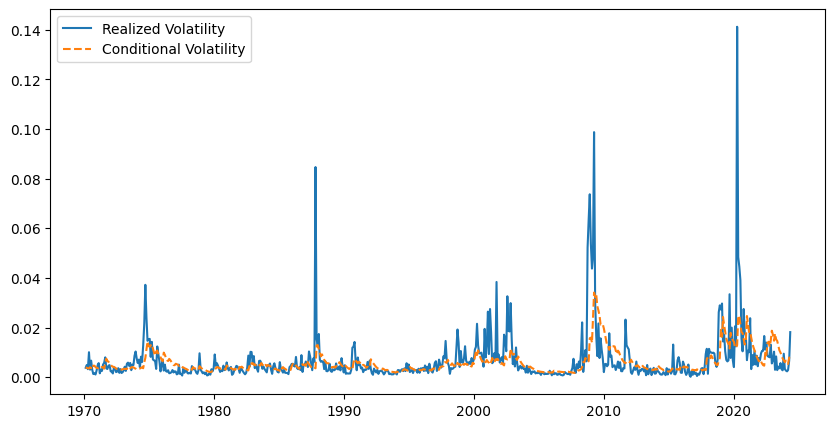

GARCH RMSE: 0.009325482165693106
GARCH MAE: 0.003937626612335591


In [16]:
garch_1_1(monthly_ge)

### (d)

In [17]:
def select_best_garch_p_q(data):
    # data=pd.DataFrame(data,columns=['logreturn'])
    best_aic = np.inf
    best_order = None
    for p in range(1, 6):
        for q in range(1, 6):
            try:
                garch_model = arch_model(data['logreturn'], vol='Garch', p=p, q=q,rescale=False)
                garch_result = garch_model.fit(disp='off')
                aic = garch_result.aic
                if aic < best_aic:
                    best_aic = aic
                    best_order = (p, q)
            except:
                pass
    print('Best AIC:', best_aic)
    print('Best Order:', best_order)
select_best_garch_p_q(monthly_sp500)

Best AIC: -2247.9254802810074
Best Order: (3, 3)


In [18]:
select_best_garch_p_q(monthly_ge)

Best AIC: -1608.694791802038
Best Order: (2, 2)


# 3 

a,b,c

Iteration:      5,   Func. Count:     44,   Neg. LLF: -1063.828112970199
Iteration:     10,   Func. Count:     77,   Neg. LLF: -1134.0143203603639
Optimization terminated successfully    (Exit mode 0)
            Current function value: -1134.0143854452176
            Iterations: 12
            Function evaluations: 90
            Gradient evaluations: 12
                   Constant Mean - GJR-GARCH Model Results                    
Dep. Variable:              logreturn   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                  GJR-GARCH   Log-Likelihood:                1134.01
Distribution:                  Normal   AIC:                          -2258.03
Method:            Maximum Likelihood   BIC:                          -2235.64
                                        No. Observations:                  651
Date:                Mon, Apr 29 2024   Df Residuals:                      650
Time:     

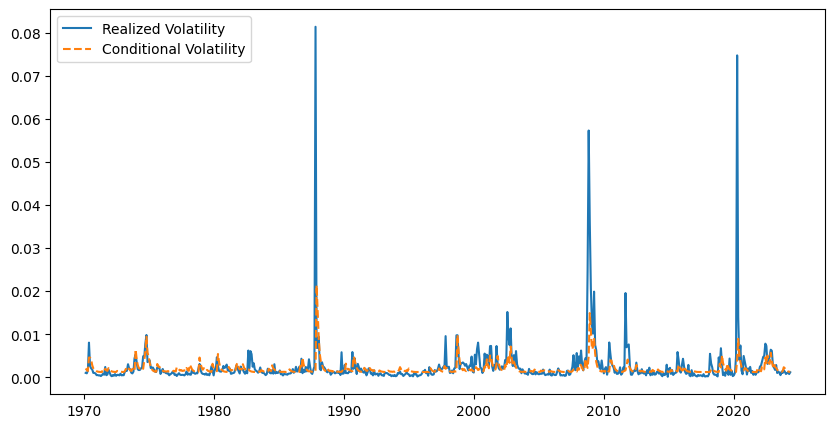

GJR GARCH RMSE: 0.00516012851126617
GJR GARCH MAE: 0.0014624348693186339


In [19]:
def gjr_garch_1_1(data): # only change is the o=0 parameter
    garch_model = arch_model(data['logreturn'], mean='constant',vol='Garch', p=1,o=1, q=1,rescale=False)
    garch_result = garch_model.fit(update_freq=5)

    # Print out the summary of the GARCH model to see the parameters.
    print(garch_result.summary())

    # Use the model to estimate the conditional volatility.
    data['conditional_volatility'] = (garch_result.conditional_volatility)**2

    # Plot the realized volatility against the conditional volatility.
    plt.figure(figsize=(10,5))
    plt.plot(data.index, data['realized_vol'], label='Realized Volatility')
    plt.plot(data.index, data['conditional_volatility'], label='Conditional Volatility', linestyle='--')
    plt.legend()
    plt.show()

    # Calculate the RMSE for the GARCH model forecasts.
    garch_rmse = np.sqrt(np.mean(np.square(data['realized_vol'] - data['conditional_volatility'])))
    garch_mae = np.mean(np.abs(data['realized_vol'] - data['conditional_volatility']))
    print('GJR GARCH RMSE:', garch_rmse)
    print('GJR GARCH MAE:', garch_mae)
gjr_garch_1_1(monthly_sp500)

Iteration:      5,   Func. Count:     45,   Neg. LLF: -772.8755719433816
Iteration:     10,   Func. Count:     80,   Neg. LLF: -678.2658138972582
Iteration:     15,   Func. Count:    116,   Neg. LLF: -814.3190327885918
Optimization terminated successfully    (Exit mode 0)
            Current function value: -814.3190327885918
            Iterations: 17
            Function evaluations: 121
            Gradient evaluations: 16
                   Constant Mean - GJR-GARCH Model Results                    
Dep. Variable:              logreturn   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                  GJR-GARCH   Log-Likelihood:                814.319
Distribution:                  Normal   AIC:                          -1618.64
Method:            Maximum Likelihood   BIC:                          -1596.25
                                        No. Observations:                  651
Date:            

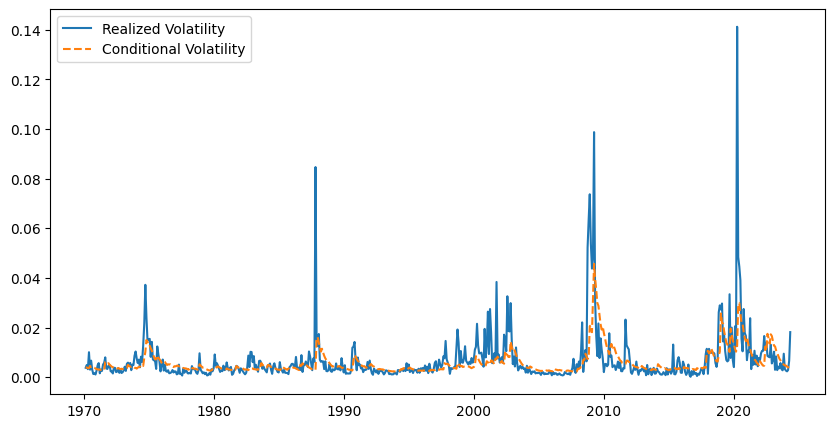

GJR GARCH RMSE: 0.008884724399105181
GJR GARCH MAE: 0.0036832027039727325


In [20]:
gjr_garch_1_1(monthly_ge)

d

In [21]:
def select_best_gjr_garch_p_o_q(data):
    # data=pd.DataFrame(data,columns=['logreturn'])
    best_aic = np.inf
    best_order = None
    for p in range(1, 6):
        for q in range(1, 6):
            for o in range(1, 6):
                try:
                    garch_model = arch_model(data['logreturn'], vol='Garch', p=p, o=o, q=q, rescale=False)
                    garch_result = garch_model.fit(disp='off')
                    aic = garch_result.aic
                    if aic < best_aic:
                        best_aic = aic
                        best_order = (p, o, q)
                except:
                    pass
    print('Best AIC:', best_aic)
    print('Best Order:', best_order)
select_best_gjr_garch_p_o_q(monthly_sp500)
select_best_gjr_garch_p_o_q(monthly_ge)

Best AIC: -2267.1028610892554
Best Order: (3, 3, 3)
Best AIC: -1623.3126290801388
Best Order: (3, 3, 2)


# 4

Sp 500:  
....AR MSE: 0.0019827771417819237  
....AR MAE: 0.033499944450777835  
  
GE:  
....AR MSE: 7.540123687400394e-05  
....AR MAE: 0.0037053382075967933  
  
Sp500:  
....GARCH RMSE: 0.005324049687354842  
....GARCH MAE: 0.001580150380844224  
  
GE:  
....GARCH RMSE: 0.009325482165693106  
....GARCH MAE: 0.003937626612335591  
  
SP500:  
....GJR GARCH RMSE: 0.00516012851126617  
....GJR GARCH MAE: 0.0014624348693186339  
  
GE:  
....GJR GARCH RMSE: 0.008884724399105181  
....GJR GARCH MAE: 0.0036832027039727325  

We see that the MAE for SP500 improves as we change to more complex models. Overall, the MAE change is not very significant. In MSE the only clear trend is that the GARCH models seem to perform worse in MSE that the AR models, but not much worse/better in MAE.